In [1]:
import arcgis
import pandas as pd
print("ArcGIS API for Python Version: {}".format(arcgis.__version__))
print("Pandas Version: {}".format(arcgis.__version__))

ArcGIS API for Python Version: 2.0.0
Pandas Version: 2.0.0


### Paths to file geodatabase

In [15]:
from pathlib import Path

fgdb_path = Path("C:\\working\\examples\\test.gdb")
table_path = fgdb_path / "ExampleTable"
point_path = fgdb_path / "ExamplePoints"
polygon_path = fgdb_path / "ExPolygon"


### Load a spatially enabled dataframe

In [16]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [17]:
sdf_points = pd.DataFrame.spatial.from_featureclass(point_path)
sdf_points.head()

,OBJECTID,POINT_X,POINT_Y,POINT_Z,SHAPE
0,1,-115.213921,41.085810,0.0,"{""x"": -115.21392128199994, ""y"": 41.08581038400..."
1,2,-109.341970,37.891224,0.0,"{""x"": -109.34197033299995, ""y"": 37.89122357300..."
2,3,-104.852836,34.510793,0.0,"{""x"": -104.85283640999995, ""y"": 34.51079322300..."
3,4,-93.382330,35.097935,0.0,"{""x"": -93.38232976699999, ""y"": 35.097935044000..."
4,5,-89.151996,38.963024,0.0,"{""x"": -89.15199606299996, ""y"": 38.963023697000..."


In [18]:
sdf_tbl = pd.DataFrame.spatial.from_table(table_path)
sdf_tbl.head()

,OBJECTID,POINT_X,POINT_Y,POINT_Z
0,1,-115.213921,41.085810,0.0
1,2,-109.341970,37.891224,0.0
2,3,-104.852836,34.510793,0.0
3,4,-93.382330,35.097935,0.0
4,5,-89.151996,38.963024,0.0


In [19]:
sdf_polygon = pd.DataFrame.spatial.from_featureclass(polygon_path)
sdf_polygon.head()

,OBJECTID,CENTROID_X,CENTROID_Y,CENTROID_Z,INSIDE_X,INSIDE_Y,INSIDE_Z,SHAPE
0,1,-120.031920,42.753741,None,-120.031920,42.753741,0.0,"{""hasZ"": true, ""rings"": [[[-121.49579655499997..."
1,2,-108.767998,35.857090,None,-108.767998,35.857090,0.0,"{""hasZ"": true, ""rings"": [[[-102.68135071499995..."
2,3,NaN,NaN,None,NaN,NaN,NaN,"{""hasZ"": true, ""rings"": [[[-97.50707369999998,..."
3,4,NaN,NaN,None,NaN,NaN,NaN,"{""hasZ"": true, ""rings"": [[[-90.40842244099997,..."
4,5,NaN,NaN,None,NaN,NaN,NaN,"{""hasZ"": true, ""rings"": [[[-92.73678005399995,..."


### Load from a data frame and set geometry

In [20]:
from arcgis.geometry import Point, Polyline, Polygon, Geometry

In [21]:

def create_point(x_long,y_lat,epsg=4326):
    return Point({"x":x_long,"y":y_lat,"spatialReference":{"wkid":epsg}})

#Need to call the geometry column SHAPE with version 2.0 of the API, bug reported
sdf_tbl["SHAPE"] = sdf_tbl[["POINT_X","POINT_Y"]].apply(lambda row:create_point(row["POINT_X"],row["POINT_Y"]),axis=1)
sdf_tbl.head()

,OBJECTID,POINT_X,POINT_Y,POINT_Z,SHAPE
0,1,-115.213921,41.085810,0.0,"{'x': -115.21392128199994, 'y': 41.08581038400..."
1,2,-109.341970,37.891224,0.0,"{'x': -109.34197033299995, 'y': 37.89122357300..."
2,3,-104.852836,34.510793,0.0,"{'x': -104.85283640999995, 'y': 34.51079322300..."
3,4,-93.382330,35.097935,0.0,"{'x': -93.38232976699999, 'y': 35.097935044000..."
4,5,-89.151996,38.963024,0.0,"{'x': -89.15199606299996, 'y': 38.963023697000..."


In [9]:
sdf_tblpnts = pd.DataFrame.spatial.from_df(sdf_tbl,geometry_column="SHAPE")

### Plotting on Map

MapView(layout=Layout(height='400px', width='100%'))


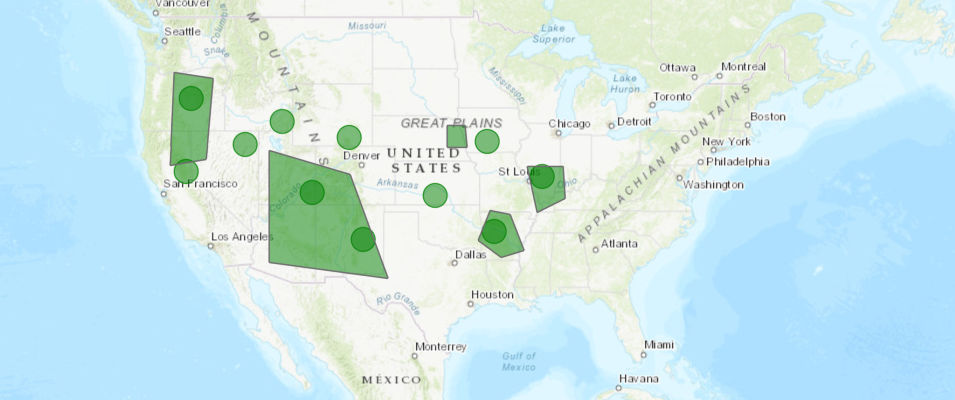

In [22]:
from arcgis import GIS
from arcgis.mapping import export_map
gis = GIS()
mp = gis.map("United States")
mp.zoom = 4
mp

In [23]:
sdf_tblpnts.spatial.plot(mp)
sdf_polygon.spatial.plot(mp)

True


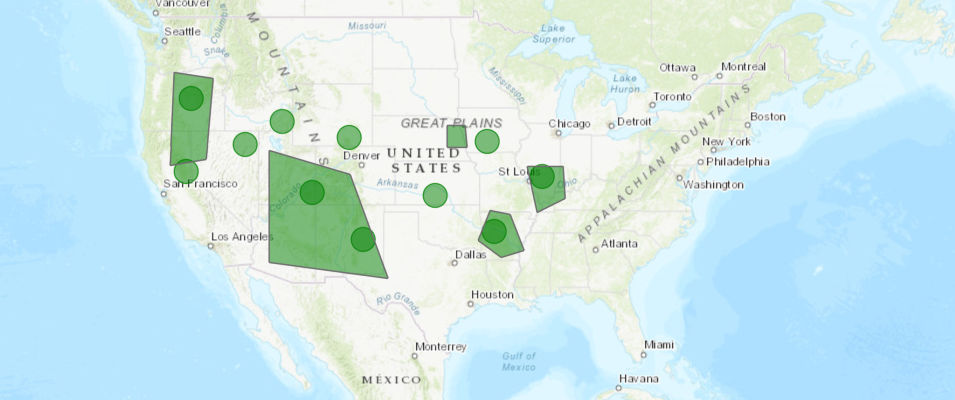

In [24]:
mp.take_screenshot()

### Save to local file geodatabase

In [31]:
out_path = fgdb_path / "ExampleTablePoints"
sdf_tblpnts.spatial.to_featureclass(out_path)

'C:\\working\\examples\\test.gdb\\ExampleTablePoints'